# Exploratory Data Analysis

In [1]:
# Load packages to retrive data and calculate statistics
from data_collection import fetch_seeds_data
from data_review import get_info, get_statistics

In [2]:
data = fetch_seeds_data()

/Users/christopher_taylor/Desktop/Python/kmean_comparison/data_collection.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(raw_url, delim_whitespace=True, header=None)


In [3]:
get_info(data)

-------------------------
Dataframe Info
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   area         210 non-null    float64 
 1   perimeter    210 non-null    float64 
 2   compactness  210 non-null    float64 
 3   length       210 non-null    float64 
 4   width        210 non-null    float64 
 5   asymmetry    210 non-null    float64 
 6   groove       210 non-null    float64 
 7   variety      210 non-null    category
dtypes: category(1), float64(7)
memory usage: 11.9 KB
None



In [4]:
get_statistics(data)

-------------------------
Descriptive Statistics
-------------------------
                area   perimeter  compactness      length       width   asymmetry      groove
count     210.000000  210.000000   210.000000  210.000000  210.000000  210.000000  210.000000
mean       14.847524   14.559286     0.870999    5.628533    3.258605    3.700201    5.408071
std         2.909699    1.305959     0.023629    0.443063    0.377714    1.503557    0.491480
min        10.590000   12.410000     0.808100    4.899000    2.630000    0.765100    4.519000
25%        12.270000   13.450000     0.856900    5.262250    2.944000    2.561500    5.045000
50%        14.355000   14.320000     0.873450    5.523500    3.237000    3.599000    5.223000
75%        17.305000   15.715000     0.887775    5.979750    3.561750    4.768750    5.877000
max        21.180000   17.250000     0.918300    6.675000    4.033000    8.456000    6.550000
skew        0.399889    0.386573    -0.537954    0.525482    0.134378    0.4016

# Functions to Visualize Data

In [7]:
# Load packages to create visualization functions
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
# Set style of plots - change to fit needs
sns.set_style('whitegrid')

In [13]:
def gen_histograms(df):
    """ 
    Function to generate histogram of numeric features 

    Parameters
    ----------
    df: dataframe
        Dataframe containing the features

    Returns
    ----------
    None:
        Histograms of numeric features
    """     
    df.hist(figsize=(15, 10), bins=20)
    
    plt.show()


def gen_histograms_by_variety(df):
    """ 
    Function to generate histogram of numeric features grouped by 'vareity' 

    Parameters
    ----------
    df: dataframe
        Dataframe containing the features

    Returns
    ----------
    None:
        Histograms of numeric features grouped by 'vareity' 
    """ 
    categorical_column = 'variety'
    numeric_columns = df.select_dtypes(include=['float64']).columns

    # Loop through numeric variables, plot against variety
    for variable in numeric_columns:
        plt.figure(figsize=(8, 4))
        ax = sns.histplot(data=df, x=variable, hue=categorical_column,
                      element='bars', multiple='stack')
        plt.xlabel(f'{variable.capitalize()}')
        plt.title(f'Distribution of {variable.capitalize()}'
              f' grouped by {categorical_column.capitalize()}')

        legend = ax.get_legend()
        legend.set_title(categorical_column.capitalize())

        plt.show()


def gen_violin(df):
    """ 
    Function to generate violin plots of numeric features grouped by 'vareity' 

    Parameters
    ----------
    df: dataframe
        Dataframe containing the features

    Returns
    ----------
    None:
        Violin plots of numeric features
    """ 
    categorical_column = 'variety'
    numeric_columns = df.select_dtypes(include=['float64']).columns
    
    for variable in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.violinplot(x=categorical_column, y=variable, hue=categorical_column, data=df)
        plt.xlabel('Variety')
        plt.ylabel(f'{variable.capitalize()}')
        plt.title(f'Violin plots of {variable.capitalize()} by {categorical_column.capitalize()}')
        plt.show()


def gen_corr_matrix_hmap(df):
    """ 
    Function to generate correlation matrix of numeric features displayed as heatmap 

    Parameters
    ----------
    df: dataframe
        Dataframe containing the features

    Returns
    ----------
    None:
        Heatmap of correlation matrix
    """ 
    corr_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))

    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})

    plt.title('Correlation Matrix Heat Map')
    plt.show()

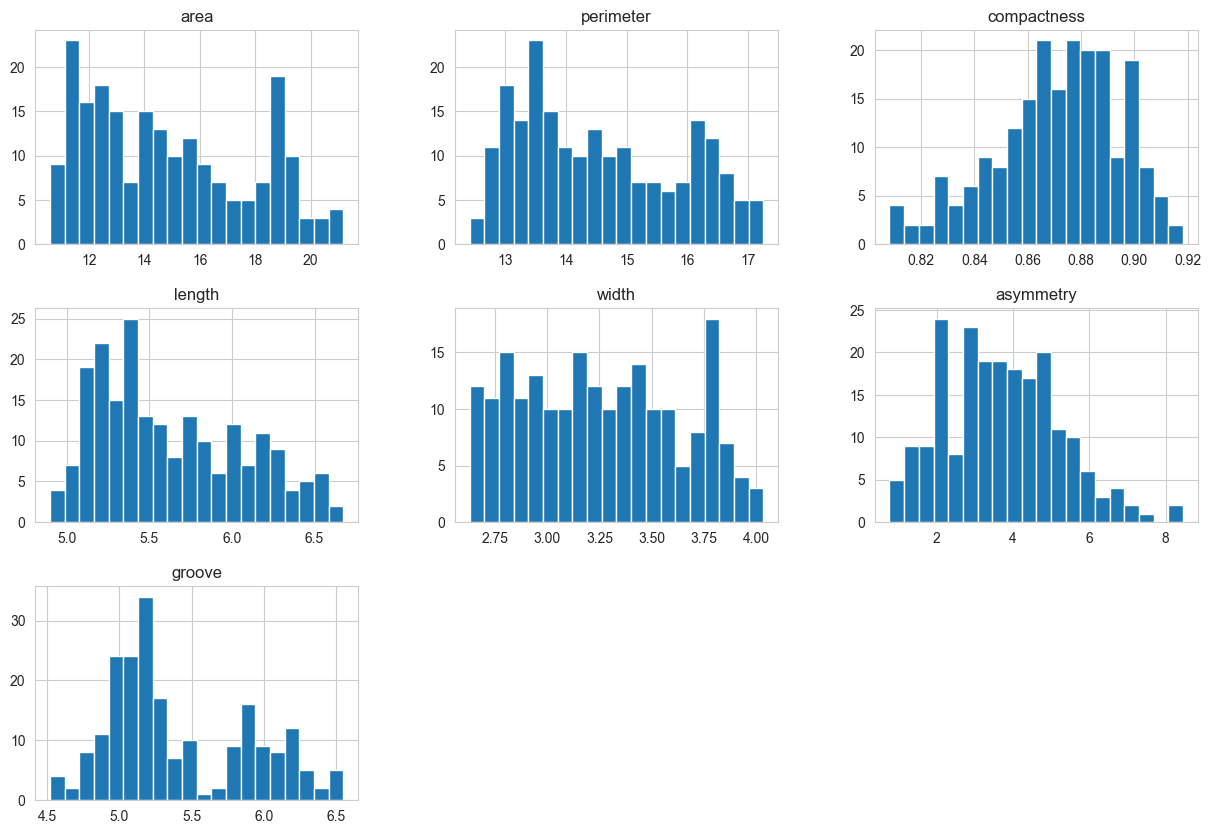

In [14]:
gen_histograms(data)

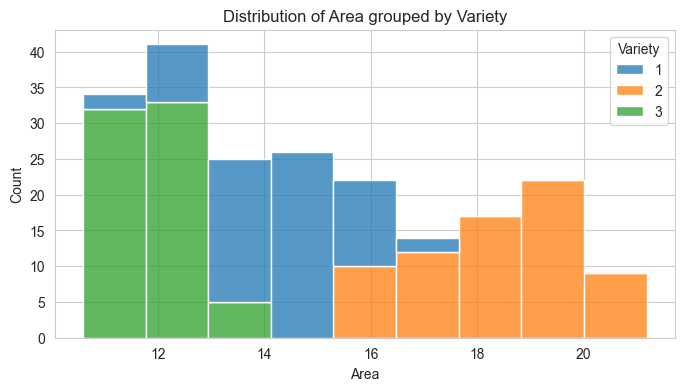

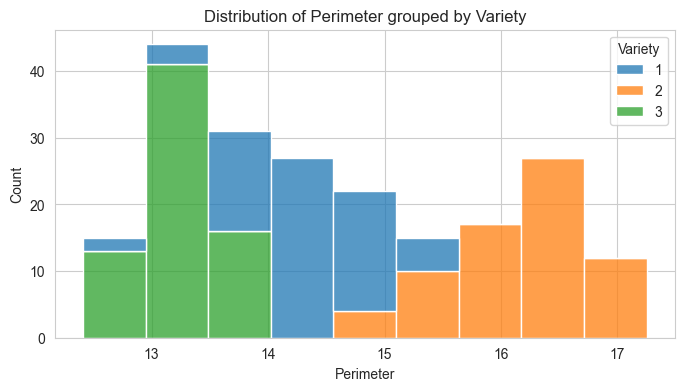

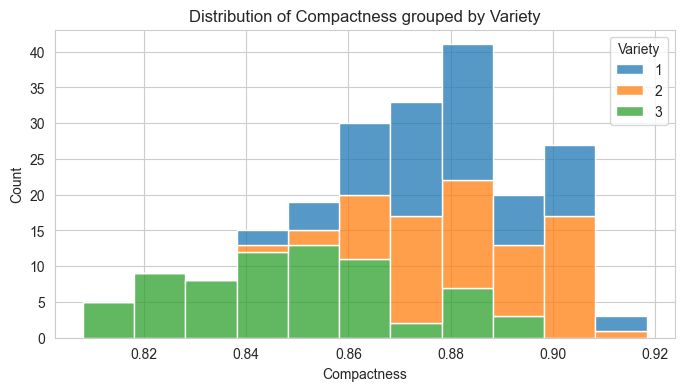

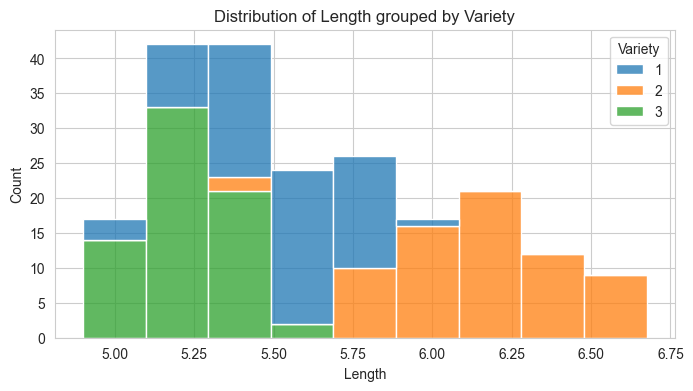

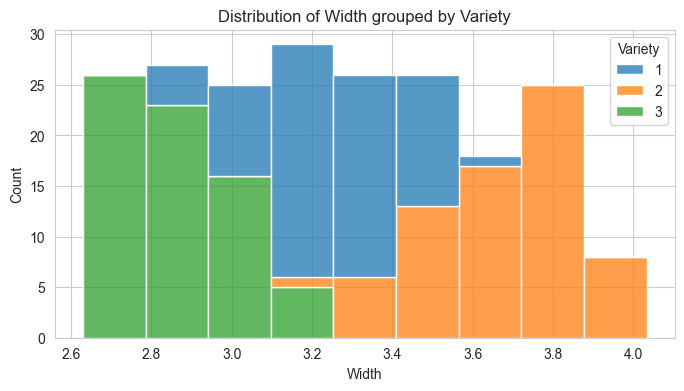

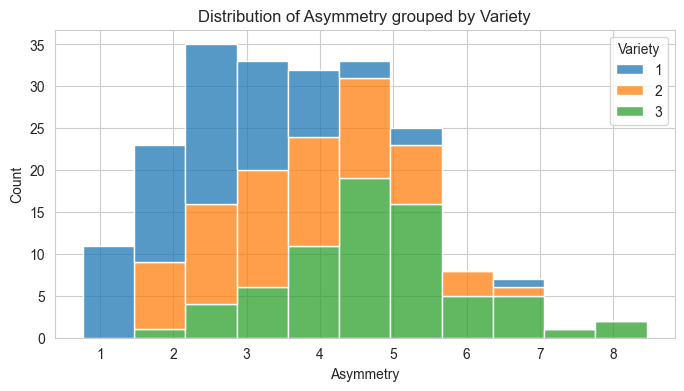

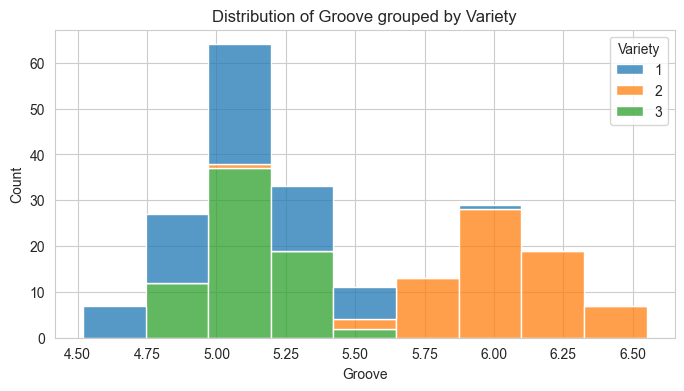

In [15]:
gen_histograms_by_variety(data)

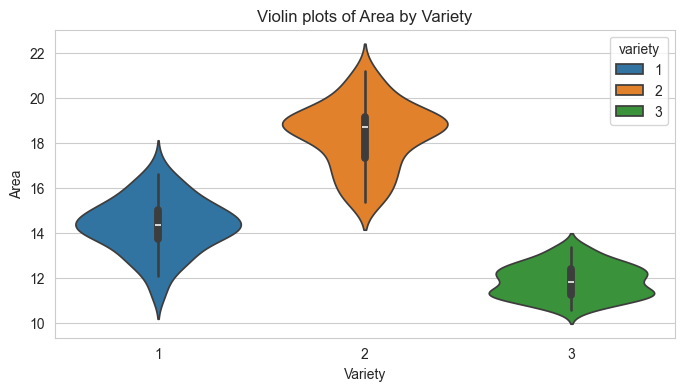

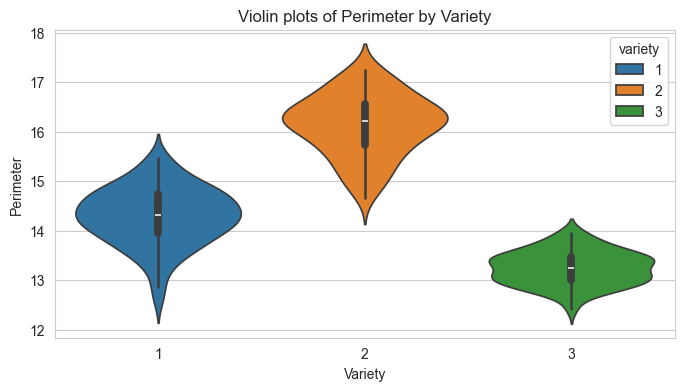

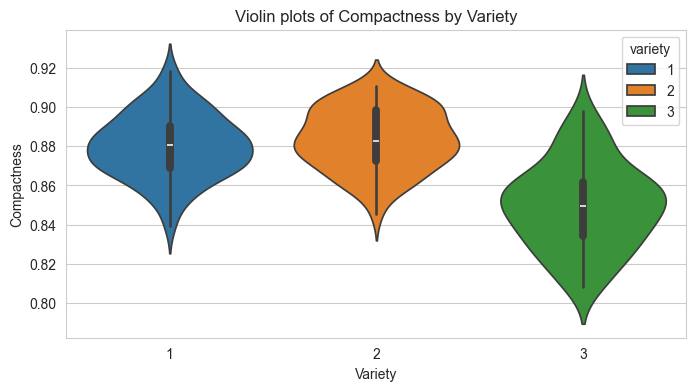

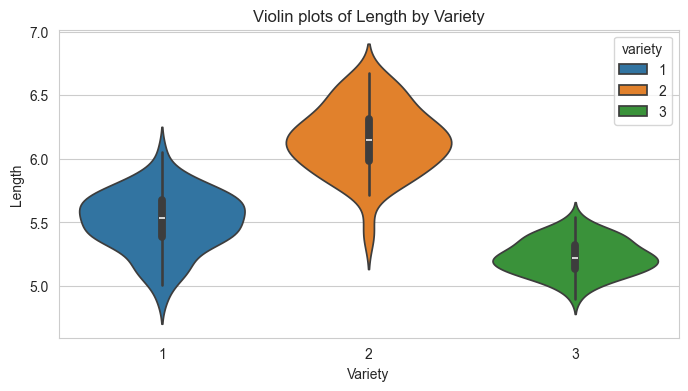

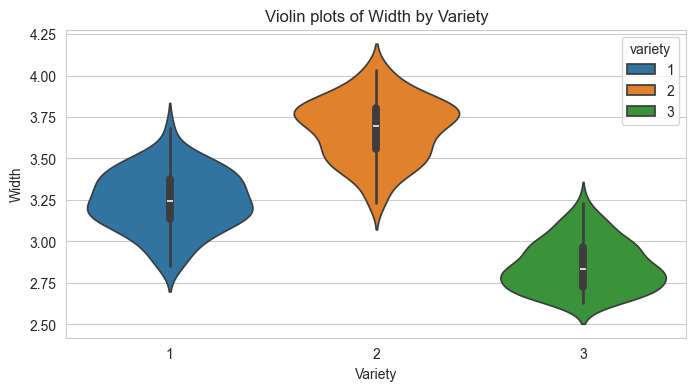

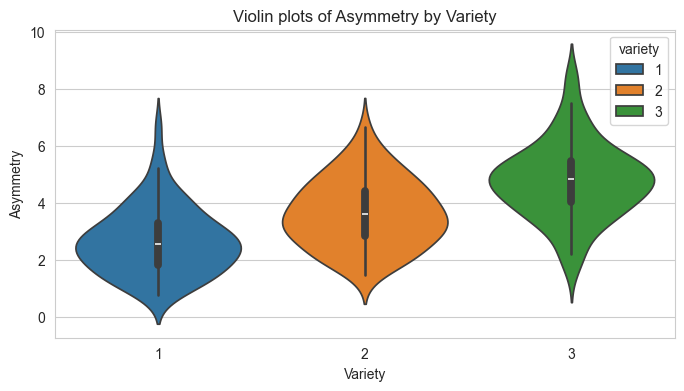

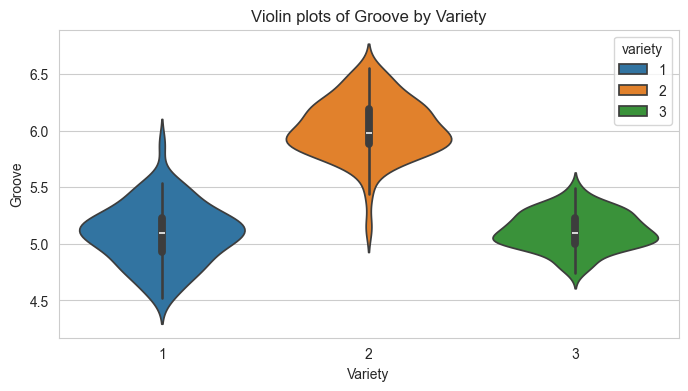

In [16]:
gen_violin(data)

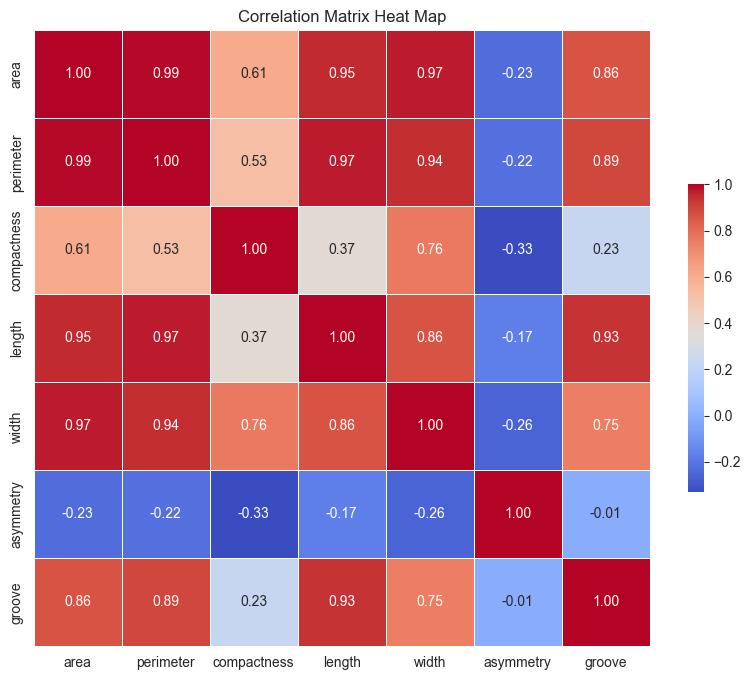

In [17]:
gen_corr_matrix_hmap(data)